# <font color=red>Python Data Science Toolbox (Part 2)

* Capítulo 1: Iteradores
* Capítulo 2: List Comprehensions e geradores
* Capítulo 3: Estudo de caso  

<br/>

##**Links úteis:**

* [Link dos slides](https://drive.google.com/drive/folders/1mrI0z1z6i3uuaxnqghAUOCVrVLnb5hAn?usp=share_link)
* [Link do curso](https://app.datacamp.com/learn/courses/python-data-science-toolbox-part-2)

**Responsáveis:** Cinthya e Maria Raquel

# <font color=red>Capítulo 1: Iteradores

##Introdução a iteradores

Iterador: um objeto que permite iterar nele, de modo que retorna dados, um elemento de cada vez.
- Para criar um iterador, usa-se a função `iter()`, que deve conter como input um objeto iterável;
- Depois disso, usa-se a função `next()` para retornar o próximo elemento daquele objeto.

In [ ]:
# Criar uma lista
devbixos1 = ['!cinthya!!', 'Maria Raquel', 'isadora russo', 'Jonathan Novais', 'Carlos Henrique', 'lorenzo']

# Criar um iterador para a lista
devbixos2 = iter(devbixos1)

# Printar cada elemento do iterador
print(next(devbixos2))
print(next(devbixos2))
print(next(devbixos2))
print(next(devbixos2))
print(next(devbixos2))
print(next(devbixos2))

!cinthya!!
Maria Raquel
isadora russo
Jonathan Novais
Carlos Henrique
lorenzo


In [ ]:
devbixos2 = iter(devbixos1)

# Iterar todos os elementos de uma vez usando *
print(*devbixos2)

!cinthya!! Maria Raquel isadora russo Jonathan Novais Carlos Henrique lorenzo


In [ ]:
# Iterar um objeto range a partir de um for loop
for i in range(10):
  print(i)

0
1
2
3
4
5
6
7
8
9


Iterável: um objeto que possui um método `iter()` associado, que quando aplicado cria um iterador. 

De modo simples, iterável é um objeto que pode ser iterado.

<br/>

<div align="center">

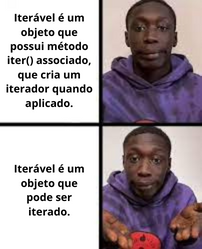

</div>

<br/>

* Exemplos: listas, range, strings, dicionários e file connections.
 

In [ ]:
for caractere in 'Fea.dev':
  print(caractere)

F
e
a
.
d
e
v


In [ ]:
# iterando em dicionários
random_word = {'liliputiano': 'extremamente pequeno', 
                'Nostradamus': 'nome de um astrólogo francês', 
                'mimeógrafo': 'instrumento usado para fazer cópias'}

for key, value in random_word.items():
  print(key, value)

liliputiano extremamente pequeno
Nostradamus nome de um astrólogo francês
mimeógrafo instrumento usado para fazer cópias


In [ ]:
# iterando em uma file connections
objeto = open('mentores.txt')

for linha in objeto:
  print(linha)

FileNotFoundError: ignored

## Brincando com iteradores

`enumerate()`: retorna uma tupla com pares de elementos: um número de uma sequência e um item do objeto.
* Muito usada quando precisa-se dos índices dos elementos de listas ou iteráveis em geral.

In [ ]:
# Como funciona a função
enumerar = enumerate(devbixos1)
enumerar = list(enumerar)
print(enumerar)

In [ ]:
# Iterando com enumerate()
for index, value in enumerate(devbixos1):
  print(index, value)

In [ ]:
# Alterando a sequência
for index, value in enumerate(devbixos1, start=15):
  print(index, value)

`zip()`: usa um ou mais iteráveis ​​como inputs e retorna tuplas, que são a fusão entre os elementos dos objetos de entrada.

In [ ]:
candidatos = ['Ka', 'Max', 'Arthur', 'Aninha']
cargos = ['Diretoria de Marketing', 'Presidas', 'Diretoria de RH', 'Diretoria de Projetos']

# Criar um objeto zip, torná-lo uma lista e printá-la
z = zip(candidatos, cargos)
z_list = list(z)
print(z_list)

In [ ]:
# Iterar sobre um objeto zip
z = zip(candidatos, cargos)

for z1, z2 in z:
  print(z1, z2)

## Usando iteradores para ler arquivos grandes

<div align="center">

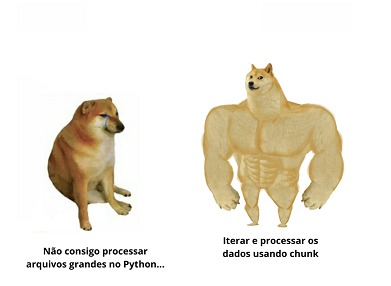

</div>

<br/>

Utilizando iterações e `chunk()`, é possível processar um dataset inteiro parte por parte, em vez de uma única passagem de uma só vez.

Vantagens:
* Processo mais rápido
* Não ocupa tanto espaço na memória

In [ ]:
import pandas as pd

In [ ]:
# Criar dicionário vazio
counts_dict = {}

# Iterar sobre o arquivo em partes
for chunk in pd.read_csv('tweets.csv', chunksize = 10):

  # Iterar sobre a coluna do df
  for entry in chunk['lang']:
    if entry in counts_dict.keys():
      counts_dict[entry] += 1
    else:
      counts_dict[entry] = 1

# Dar um print no dicionário
print(counts_dict)

In [ ]:
# Define a função count_entries()
def count_entries(csv_file, c_size, colname):
    """Retorna um dicionário com a contagem de ocorrências 
    como valor para cada chave."""
    
    counts_dict = {}

    # Iterar sobre arquivo parte por parte
    for chunk in pd.read_csv(csv_file, chunksize=c_size):

        # Iterar sobre uma coluna do df
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1

    # Retornar counts_dict
    return counts_dict

In [ ]:
result_counts2 = count_entries('tweets.csv', 10, 'lang')
print(result_counts2)

In [ ]:
result_counts1 = count_entries('carteiras.csv', 200, 'ativo_desc')
print(result_counts1)

In [ ]:
df = pd.read_csv('tweets.csv')
df.value_counts('lang')

 # <font color=red>Capítulo 2: Comprehensions e geradores

## **Comprehensions**

### Por que utilizar?

**```Comprehensions```, em alguns casos, são muito mais eficientes do que ```for loops``` em termos de computação e de espaço no código**, quando a intenção é gerar listas ou dicionários.

Veja o exemplo abaixo, que expõe a diferença de velocidade no processamento de um ```for loop``` e de uma ```list comprehension``` com a exata mesma função.


In [ ]:
# Criando uma lista com os números 0 a 999 multiplicados por 2 e acrescidos de 10
# utilizando for loop

# Importando o módulo time para verificar o tempo de execução do código
import time 

# Registrando o tempo inicial
start_for = time.time()

# Criando uma lista vazia
my_list = [] 

for i in range(0,1000): # Iterando através dos números 0 a 999 
  my_list.append(i*2 + 10) # Dobrando e somando 10 a cada número

# Registrando o tempo final
end_for = time.time()

print(my_list) # Printando a lista de números criada

print('Tempo de execução do loop: ', round((end_for - start_for) * 10 ** 3, 4), 'ms')

[10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420, 422, 424, 426,

In [ ]:
# Criando uma lista com os números 0 a 999 multiplicados por 2 e acrescidos de 10
# utilizando list comprehension

# Registrando o tempo inicial
start_list = time.time()

# Criando a lista a partir de list comprehension
your_list = [i*2 + 10 for i in range(0,1000)]

# Registrando o tempo final
end_list = time.time()

print(my_list) # Printando a lista de números criada, idêntica à anterior

print('Tempo de execução da list comprehension: ', round((end_list - start_list) * 10 ** 3, 4), 'ms')

[10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420, 422, 424, 426,

In [ ]:
# Computando a diferença de velocidade entre os dois métodos:
dif_list = end_list - start_list
dif_for = end_for - start_for

#Printando a diferença de velocidade entre os dois métodos
print("Diferença de tempo: ", ((dif_for - dif_list)/dif_list*100), '%')

Diferença de tempo:  45.552297165200386 %


Podemos observar o mesmo efeito quando fazemos uso de ```dict comprehensions```. No exemplo abaixo, vamos construir dois dicionários: um por meio de um ```for loop``` e o outro através de uma ```dict comprehension```



In [ ]:
dev_bixos = ['Carlos', 'Cinthya', 'Isadora', 'Jhonatan', 'Lorenzo', 'Maria Raquel'] # Lista com os novos bixos da dev
graduacao = ['Econo', 'Econo', 'Econo', 'Eng Metalúrgica', 'Econo', 'ADM'] # Lista com seus respectivos cursos

In [ ]:
# Construindo dicionário através de for loop

dicionario = {} # Inicializando dicionário vazio

start_for = time.time() # Contabilizando o tempo inicial

for nomes, cursos in zip(dev_bixos, graduacao):
  dicionario[nomes] = cursos # Atribuindo a cada nome (chave) um curso (valor)

print(dicionario)
end_for = time.time() # Contabilizando o tempo final

print('Tempo de execução do for: ', round((end_for - start_for) * 10 ** 3, 4), 'ms')

{'Carlos': 'Econo', 'Cinthya': 'Econo', 'Isadora': 'Econo', 'Jhonatan': 'Eng Metalúrgica', 'Lorenzo': 'Econo', 'Maria Raquel': 'ADM'}
Tempo de execução do for:  1.5104 ms


*Disclaimer sobre a utilidade da função ```zip()```:*


In [ ]:
# Disclaimer: a função zip torna possível iterar através de duas listas sem precisar de uma variável index a mais
#(de primeira eu tinha feito assim, antes de pensar na função zip)

index = 0
for nomes in dev_bixos:
  dicionario[nomes] = graduacao[index] 
  index += 1 


*Fim do disclaimer*





In [ ]:
# Construindo dicionário atráves de dict comprehension

start_dict = time.time() 

# Criando o mesmo dicionário através de uma dict comprehension
dicionario = {nomes: cursos for nomes, cursos in zip(dev_bixos, graduacao)}

end_dict = time.time()

print(dicionario) # Printando o dicionário

print('Tempo de execução da dict comprehension: ', round((end_dict - start_dict) * 10 ** 3, 4), 'ms')

{'Carlos': 'Econo', 'Cinthya': 'Econo', 'Isadora': 'Econo', 'Jhonatan': 'Eng Metalúrgica', 'Lorenzo': 'Econo', 'Maria Raquel': 'ADM'}
Tempo de execução da dict comprehension:  0.1168 ms


In [ ]:
for_dif = end_for - start_for 
dif_dict = end_dict - start_dict

#Printando a diferença de velocidade entre os dois métodos
print("Diferença de tempo: ", ((dif_for - dif_dict)/dif_dict*100), '%')



Diferença de tempo:  203.87755102040813 %


Note que não só as comprehensions foram muito mais rápidas em termos de processamento, como também evitam a necessidade de criação de uma lista ou dicionário vazios e toda a escrita da estrutura de um for, reduzindo as linhas de código utilizadas.

*Disclaimer:*

A depender de qual o seu objetivo, **uma ferramenta pode ser melhor do que outra**.

Para a *criação de listas* ou *dicionários*, as ```list``` e ```dict comprehensions``` são mais eficientes.  Mas caso a criação de uma lista/dict *não seja o objetivo*, e a intenção seja somente de chamar funções ou fazer operações computacionais básicas, os ```for loops``` podem ser mais velozes. 

Referências: [Python List Comprehensions vs. For Loops: Which One to Use and When](https://vegibit.com/python-list-comprehensions-vs-for-loops-which-one-to-use-and-when/) |   [Comprehensive Guide to Python List Comprehensions](https://pythonsimplified.com/comprehensive-guide-to-python-list-comprehensions/#What_happens_under_the_hood) | [Why is this loop faster than a dictionary comprehension for creating a dictionary?](https://stackoverflow.com/questions/52542742/why-is-this-loop-faster-than-a-dictionary-comprehension-for-creating-a-dictionar) | [Speed/efficiency comparison for loop vs list comprehension vs other methods](https://stackoverflow.com/questions/28581218/speed-efficiency-comparison-for-loop-vs-list-comprehension-vs-other-methods)





### Sintaxe das ```list``` e ```dict comprehensions```

**(i) Atenção:** para ```list comprehensions```, usamos ```[]```; para ```dict comprehensions``` usamos ```{}``` e para ```geradores``` usamos ```()```


**(ii) Atenção:** lembre-se do que é um objeto pelo qual se pode iterar: 

podemos iterar por 

```range(50)``` (range de números)

 ```'Econometristes'``` (string)
 
```['Carlos', 'Cinthya', 'Isadora', 'Jhonatan', 'Lorenzo', 'Maria Raquel']``` (lista)
  
```{'Carlos': 'Econo', 'Cinthya': 'Econo', 'Isadora': 'Econo', 'Jhonatan': 'ADM', 'Lorenzo': 'Econo', 'Maria Raquel': 'ADM'}``` (dicionário)
    
mas não por ```numero_inteiro = int(5.0)```, por exemplo.




#### **```List comprehensions```**

**```new_list = [output for iterator in iterable]```**

*Exemplo*:




In [ ]:
squares = [i**2 for i in range(0,10)] # Eleva os números de 0 a 9 ao quadrado
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]



**```new_list = [output for iterator in iterable if conditional]```**

*Exemplo*:







In [ ]:
#  Eleva os números pares de 0 a 9 ao quadrado 
squares = [i**2 for i in range(0,10) if i%2 ==0] 
print(squares)

[0, 4, 16, 36, 64]



**```new_list = [output if conditional else alternative_output for iterator in iterable]```**

*Exemplo*:




In [ ]:
#  Eleva os números pares de 0 a 9 ao quadrado e printa '-' no lugar dos quadrados dos ímpares
squares = [i**2 if i % 2 == 0 else '-' for i in range(0,10)] 
print(squares)

[0, '-', 4, '-', 16, '-', 36, '-', 64, '-']


*Obs: para usar o ```else```, precisamos colocar a condicional no início da ```comprehension```. Veja:*




In [ ]:
# Else colocado no final: não funciona
squares = [i**2 for i in range(0,10) if i% 2 == 0 else '-'] #  Eleva os números pares de 0 a 9 ao quadrado 
print(squares)

SyntaxError: ignored

In [ ]:
# COndicional sem else no início: não funciona
squares = [i**2 if i % 2 == 0 for i in range(0,10)] #  Eleva os números pares de 0 a 9 ao quadrado 
print(squares)

SyntaxError: ignored

Também podemos usar operadores como ```and```, ```or``` e ```not```:


In [ ]:
squares = [i**2 for i in range(0,10) if i% 2 == 0 or i%3 == 0] #  Eleva somente os números de 0 a 9 divisíveis por 2 ou 3
print(squares)

[0, 4, 9, 16, 36, 64, 81]


In [ ]:
squares = [i**2 for i in range(0,10) if i% 2 == 0 and i%3 == 0] #  Eleva somente os números de 0 a 9 divisíveis por 2 e 3
print(squares)

[0, 36]


Tabém é possível criar ```list comprehensions``` uma dentro da outra, tal qual fazemos com os ```for loops```!

Nesse caso, a ```output expression``` será outra ```list comprehension```.


In [ ]:
#Printando a matriz usando list comprehension

matrix = [[col for col in range(0,5)] for row in range(0,5)] # criando matriz
for row in matrix: # printando matriz
  print(row)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [ ]:
#Printando a matriz usando for loop
lista_exterior = [] # Criando a lista do loop exterior
lista_interior = [] # Criando a lista do loop interior

for row in range(0,5): # Loopando pelas linhas
  for col in range(0,5): # Loopando pelas colunas
    lista_interior.append(col) # Criando a lista que será adicionada em cada linha da matriz
  lista_exterior.append(lista_interior) # Adicionando a lista de cada linha à matriz
  lista_interior = [] # Reiniciando a lista interior 
  
for row in lista_exterior: # Printando a matriz
  print(row)


[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [ ]:
dev_bixos = ['Carlos', 'Cinthya', 'Isadora', 'Jhonatan', 'Lorenzo', 'Maria Raquel'] # Lista com os novos bixos da dev
graduacao = ['Econo', 'Econo', 'Econo', 'Eng Metalúrgica', 'Econo', 'ADM'] # Lista com seus respectivos cursos


#### **```Dict comprehensions```**

Para cada item no objeto iterável, vamos gerar um par ```key:value```.


**```new_dic = {output_key:output_value for iterator in iterable}```**

*Exemplo*:




In [ ]:
nome_curso = {nome:curso for nome, curso in zip(dev_bixos, graduacao)}
print(nome_curso)

{'Carlos': 'Econo', 'Cinthya': 'Econo', 'Isadora': 'Econo', 'Jhonatan': 'Eng Metalúrgica', 'Lorenzo': 'Econo', 'Maria Raquel': 'ADM'}


In [ ]:
# Note que não faz sentido usar '[' e ']' se vc está criando um par chave:valor
nome_curso = [nome:curso for nome, curso in zip(dev_bixos, graduacao)]
print(nome_curso)

SyntaxError: ignored

Condicional no fim (sem else):

**```new_dic  = {output_key:output_value for iterator in iterable if conditional}```**

*Exemplo*:




In [ ]:
nome_curso = {nome:curso for nome, curso in zip(dev_bixos, graduacao) if curso!='Econo'}
print(nome_curso)

{'Jhonatan': 'Eng Metalúrgica', 'Maria Raquel': 'ADM'}



1 condicional no ```value```

**```new_dic  = {output_key:(output_value if conditional else alternative_value) for iterator in iterable}```**


*Exemplo*:

In [ ]:
nome_curso = {nome:(curso if curso!='Econo' else 'curso de doido') for nome, curso in zip(dev_bixos, graduacao) }
print(nome_curso)

{'Carlos': 'curso de doido', 'Cinthya': 'curso de doido', 'Isadora': 'curso de doido', 'Jhonatan': 'Eng Metalúrgica', 'Lorenzo': 'curso de doido', 'Maria Raquel': 'ADM'}


In [ ]:
for nome, curso in zip(dev_bixos, graduacao):
  if nome[0] == 'C':
    print(nome, curso)
  else:
    print(curso)

Carlos Econo
Cinthya Econo
Econo
Eng Metalúrgica
Econo
ADM


Dá pra brincar mais com os if-elses nas dict comprehensions! Só que eu tive problemas. Enfim...

#### Códigos com problema


1 condicional na ```key```

**```new_dic  = {(output_key if conditional else alternative_key):output_value if conditional else alternative_value) for iterator in iterable}```**

*Exemplo:*

In [ ]:
#Printa os valores de 0 a 10 multiplicados por 2 para as chaves 
a = 'nothing'
dic_test = {(a if i < 6 else i):i*2 for i in range(0,11)}
print(dic_test)

{'nothing': 10, 6: 12, 7: 14, 8: 16, 9: 18, 10: 20}


In [ ]:
string = 'Aluno jubilado'
nome_curso = {(nome if len(nome)==7 else string):curso for nome, curso in zip(dev_bixos, graduacao) }
print(nome_curso)

{'Aluno jubilado': 'ADM', 'Cinthya': 'Econo', 'Isadora': 'Econo', 'Lorenzo': 'Econo'}



condicionais em ambos ```key``` e ```value```


**```new_dic  = {(output_key if conditional else alternative_key):(output_value if conditional else alternative_value) for iterator in iterable}```**

*Exemplo:*

In [ ]:
nome_curso = {(nome if nome[0] == 'C' else 'Aluno Jubilado'):(curso if curso!='Econo' else 'Curso de doido') for nome, curso in zip(dev_bixos, graduacao)}
print(nome)
print(nome_curso)

Maria Raquel
{'Carlos': 'Curso de doido', 'Cinthya': 'Curso de doido', 'Aluno Jubilado': 'ADM'}


{(a if condition else b): value for key, value in dict.items()}

## Generators
* Mesma sintaxe de uma list comprehension. Usa-se ```( )``` ao invés de ```[ ]``` ou ```{}```
* Retornam ```generator objects```, da mesma forma que ```list comprehensions``` retornam listas e ```dict comprehensions``` retornam dicionários
* Em funções como ```items()``` e ```range()``` Python cria geradores para nós por debaixo dos panos!


In [ ]:
gerador = (i for i in range(0,10))
print(gerador)

<generator object <genexpr> at 0x7f0a28ec0820>


In [ ]:
print(type(gerador))

<class 'generator'>



* É similar a uma comprehension mas é um objeto que **não armazena os valores na memória**. Pode ser iterado para reproduzir os valores gerados.

* Útil para trabalhar com grandes sequências numéricas, como um range de números de 0 a Googol (1 seguido de cem zeros)



In [ ]:
print(next(gerador))

0


In [ ]:
print(next(gerador))

1


Eventualmente, a lista de elementos criados pelo gerador chega ao fim. Veja:


In [ ]:
for i in range(0,10):
  print(next(gerador))

2
3
4
5
6
7
8
9


StopIteration: ignored

Podemos, também, definir **funções geradoras**. A sintaxe é a *mesma*, mas ao invés de ```return```, utilizaremos ```yield```.


In [ ]:
#Função geradora que gera números de 0 ao infinito

def range_infinito():
  num = 0
  while True:
    yield num
    num +=1

Chamando 
```
for i in range_infinito():
  print(i, end = " ")

```

a função rodaria infinitamente, até que você interrompa ela manualmente.

Esse link do Stack Overflow discute soluções para resetar um gerador: [https://stackoverflow.com/questions/1271320/resetting-generator-object-in-python](https://stackoverflow.com/questions/1271320/resetting-generator-object-in-python)